In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
Train_data = pd.read_excel('C:\\Users\\santu\\OneDrive\\Desktop\\PROJECT FLIP ROBO\\ML\\Data_Train.xlsx')
Test_data  = pd.read_excel('C:\\Users\\santu\\OneDrive\\Desktop\\PROJECT FLIP ROBO\\ML\\Data_Test.xlsx')

In [3]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
Train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
Test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [7]:
print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (12690, 9)


Test_data: (4231, 8)


In [8]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [9]:
Train_data.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

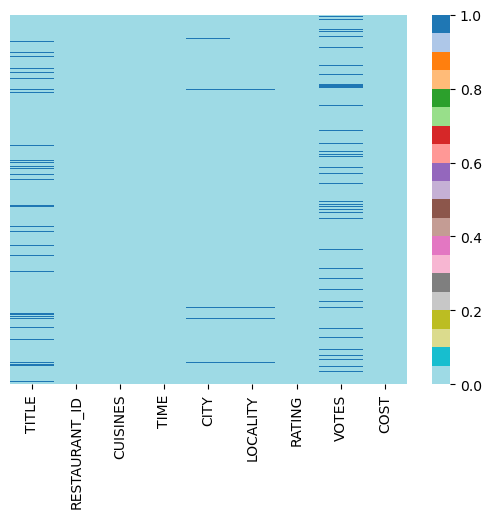

In [10]:
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=True,cmap='tab20_r')
plt.show()

In [11]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [15]:
for col in ['TITLE','CITY','LOCALITY','RATING','VOTES']:
  Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)

In [16]:
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [17]:
Train_data['TITLE_1'] = Train_data['TITLE'].str.split(',').str[0]
Train_data['TITLE_2'] = Train_data['TITLE'].str.split(',').str[1]

In [18]:
Train_data['CUISINES_1'] = Train_data['CUISINES'].str.split(',').str[0]
Train_data['CUISINES_2'] = Train_data['CUISINES'].str.split(',').str[1]
Train_data['CUISINES_3'] = Train_data['CUISINES'].str.split(',').str[2]
Train_data['CUISINES_4'] = Train_data['CUISINES'].str.split(',').str[3]

In [19]:
Train_data['TIME_1'] = Train_data['TIME'].str.split(',').str[0]
Train_data['TIME_2'] = Train_data['TIME'].str.split(',').str[1]

In [20]:
Train_data.drop(['TITLE'],axis=1, inplace= True)
Train_data.drop(['CUISINES'],axis=1, inplace= True)
Train_data.drop(['TIME'],axis=1, inplace= True)

In [21]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,13198,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,6pm – 11pm (Mon-Sun),NaN
2,10915,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,6346,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,11:30am – 1am (Mon-Sun),NaN
4,15387,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,11am – 1am (Mon-Sun),NaN


In [22]:
Train_data.isnull().values.any()

True

In [23]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RESTAURANT_ID  12690 non-null  int64 
 1   CITY           12690 non-null  object
 2   LOCALITY       12690 non-null  object
 3   RATING         12690 non-null  object
 4   VOTES          12690 non-null  object
 5   COST           12690 non-null  int64 
 6   TITLE_1        12690 non-null  object
 7   TITLE_2        1482 non-null   object
 8   CUISINES_1     12690 non-null  object
 9   CUISINES_2     9628 non-null   object
 10  CUISINES_3     5691 non-null   object
 11  CUISINES_4     2695 non-null   object
 12  TIME_1         12690 non-null  object
 13  TIME_2         3252 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.4+ MB


In [24]:
Train_data=Train_data.replace('None',np.nan)
Train_data

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,13198,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,6pm – 11pm (Mon-Sun),NaN
2,10915,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,6346,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,11:30am – 1am (Mon-Sun),NaN
4,15387,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,11am – 1am (Mon-Sun),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,Hyderabad,Gachibowli,3.8,546 votes,500,QUICK BITES,NaN,North Indian,Burger,Kebab,NaN,12noon – 12midnight (Mon,Tue
12686,9686,Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,CASUAL DINING,BAR,Goan,Continental,NaN,NaN,12noon – 1am (Mon-Fri),11am – 5pm
12687,11133,Navi Mumbai,Vashi,4.0,608 votes,1300,LOUNGE,NaN,Finger Food,Continental,Asian,Chinese,12noon – 12:30AM (Mon-Sun),NaN
12688,6134,Chennai,Maduravoyal,3.5,32 votes,400,CASUAL DINING,NaN,North Indian,South Indian,Chinese,Street Food,6am – 10:45pm (Mon-Sun),NaN


In [25]:
Train_data.isnull().sum()

RESTAURANT_ID        0
CITY                 0
LOCALITY             0
RATING               0
VOTES                0
COST                 0
TITLE_1              0
TITLE_2          11208
CUISINES_1           0
CUISINES_2        3062
CUISINES_3        6999
CUISINES_4        9995
TIME_1               0
TIME_2            9438
dtype: int64

<Axes: >

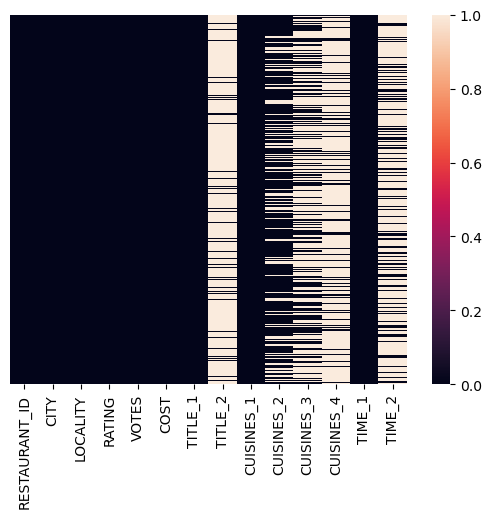

In [26]:
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=True)

In [27]:
for col in ['TITLE_1','TITLE_2','CUISINES_2','CUISINES_3','CUISINES_4','TIME_2']:
  Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)

In [28]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,BAR,Malwani,Goan,North Indian,Chinese,11am – 4pm,7:30pm – 11:30pm (Mon-Sun)
1,13198,Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,Chinese,6pm – 11pm (Mon-Sun),7pm – 11pm (Mon-Sun)
2,10915,Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,BAR,North Indian,Chinese,Biryani,Hyderabadi,11am – 3:30pm,7pm – 11pm (Mon-Sun)
3,6346,Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,BAR,Tibetan,Chinese,Chinese,Chinese,11:30am – 1am (Mon-Sun),7pm – 11pm (Mon-Sun)
4,15387,Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,BAR,Desserts,Chinese,Chinese,Chinese,11am – 1am (Mon-Sun),7pm – 11pm (Mon-Sun)


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#CITY
Train_data['CITY']=le.fit_transform(Train_data['CITY'])

#LOCALITY
Train_data['LOCALITY']=le.fit_transform(Train_data['LOCALITY'])

#TITLE_1
Train_data['TITLE_1']=le.fit_transform(Train_data['TITLE_1'])

#TITLE_2
Train_data['TITLE_2']=le.fit_transform(Train_data['TITLE_2'])

#CUISINES_1
Train_data['CUISINES_1']=le.fit_transform(Train_data['CUISINES_1'])

#CUISINES_2
Train_data['CUISINES_2']=le.fit_transform(Train_data['CUISINES_2'])

#CUISINES_3
Train_data['CUISINES_3']=le.fit_transform(Train_data['CUISINES_3'])

#CUISINES_4
Train_data['CUISINES_4']=le.fit_transform(Train_data['CUISINES_4'])

#TIME_1
Train_data['TIME_1']=le.fit_transform(Train_data['TIME_1'])

#TIME_2
Train_data['TIME_2']=le.fit_transform(Train_data['TIME_2'])

#for votes we have to remove votes.
Train_data=Train_data.replace(['votes'],[''],regex=True)

In [30]:
Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165,300,8,1,28,23,21,18,316,291


In [31]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RESTAURANT_ID  12690 non-null  int64 
 1   CITY           12690 non-null  int32 
 2   LOCALITY       12690 non-null  int32 
 3   RATING         12690 non-null  object
 4   VOTES          12690 non-null  object
 5   COST           12690 non-null  int64 
 6   TITLE_1        12690 non-null  int32 
 7   TITLE_2        12690 non-null  int32 
 8   CUISINES_1     12690 non-null  int32 
 9   CUISINES_2     12690 non-null  int32 
 10  CUISINES_3     12690 non-null  int32 
 11  CUISINES_4     12690 non-null  int32 
 12  TIME_1         12690 non-null  int32 
 13  TIME_2         12690 non-null  int32 
dtypes: int32(10), int64(2), object(2)
memory usage: 892.4+ KB


In [32]:
Train_data['VOTES'].unique()
Train_data['VOTES']=Train_data['VOTES'].astype(float)
Train_data['VOTES']=Train_data['VOTES'].fillna(Train_data['VOTES'].mean())

#for RATING
Train_data['RATING'].unique()
Train_data['RATING']=Train_data['RATING'].replace(['NEW'],np.nan)
Train_data['RATING']=Train_data['RATING'].replace(['-'],np.nan)
Train_data['RATING']=Train_data['RATING'].astype(float)
Train_data['RATING']=Train_data['RATING'].fillna(Train_data['RATING'].mean())

Train_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,300,8,1,28,23,21,18,316,291


In [33]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RESTAURANT_ID  12690 non-null  int64  
 1   CITY           12690 non-null  int32  
 2   LOCALITY       12690 non-null  int32  
 3   RATING         12690 non-null  float64
 4   VOTES          12690 non-null  float64
 5   COST           12690 non-null  int64  
 6   TITLE_1        12690 non-null  int32  
 7   TITLE_2        12690 non-null  int32  
 8   CUISINES_1     12690 non-null  int32  
 9   CUISINES_2     12690 non-null  int32  
 10  CUISINES_3     12690 non-null  int32  
 11  CUISINES_4     12690 non-null  int32  
 12  TIME_1         12690 non-null  int32  
 13  TIME_2         12690 non-null  int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 892.4 KB


In [34]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [35]:
for col in ['CITY','LOCALITY','RATING','VOTES']:
  Test_data[col].fillna(Test_data[col].mode()[0],inplace=True)

#Splitting Titles in two various columns
Test_data['TITLE_1'] = Test_data['TITLE'].str.split(',').str[0]
Test_data['TITLE_2'] = Test_data['TITLE'].str.split(',').str[1] 

#Splitting cousines in four various columns
Test_data['CUISINES_1'] = Test_data['CUISINES'].str.split(',').str[0]
Test_data['CUISINES_2'] = Test_data['CUISINES'].str.split(',').str[1]
Test_data['CUISINES_3'] = Test_data['CUISINES'].str.split(',').str[2]
Test_data['CUISINES_4'] = Test_data['CUISINES'].str.split(',').str[3]

#Splitting Time in two various columns
Test_data['TIME_1'] = Test_data['TIME'].str.split(',').str[0]
Test_data['TIME_2'] = Test_data['TIME'].str.split(',').str[1]

#now we drop title, time and ciusine columns as it has no use
Test_data.drop(['TITLE'],axis=1, inplace= True)
Test_data.drop(['CUISINES'],axis=1, inplace= True)
Test_data.drop(['TIME'],axis=1, inplace= True)


#Replacing the 'None' with NaN
Test_data=Train_data.replace('None',np.nan)

#Imputing the missing value with mode

for col in ['TITLE_1','TITLE_2','CUISINES_2','CUISINES_3','CUISINES_4','TIME_2']:
  Test_data[col].fillna(Test_data[col].mode()[0],inplace=True)

#encoding

#CITY
Test_data['CITY']=le.fit_transform(Test_data['CITY'])

#LOCALITY
Test_data['LOCALITY']=le.fit_transform(Test_data['LOCALITY'])

#TITLE_1
Test_data['TITLE_1']=le.fit_transform(Test_data['TITLE_1'])

#TITLE_2
Test_data['TITLE_2']=le.fit_transform(Test_data['TITLE_2'])

#CUISINES_1
Test_data['CUISINES_1']=le.fit_transform(Test_data['CUISINES_1'])

#CUISINES_2
Test_data['CUISINES_2']=le.fit_transform(Test_data['CUISINES_2'])

#CUISINES_3
Test_data['CUISINES_3']=le.fit_transform(Test_data['CUISINES_3'])

#CUISINES_4
Test_data['CUISINES_4']=le.fit_transform(Test_data['CUISINES_4'])

#TIME_1
Test_data['TIME_1']=le.fit_transform(Test_data['TIME_1'])

#TIME_2
Test_data['TIME_2']=le.fit_transform(Test_data['TIME_2'])

In [36]:
#for VOTES
Test_data['VOTES'].unique()
Test_data['VOTES']=Test_data['VOTES'].astype(float)
Test_data['VOTES']=Test_data['VOTES'].fillna(Test_data['VOTES'].mean())

#for RATING
Test_data['RATING'].unique()
Test_data['RATING']=Test_data['RATING'].replace(['NEW'],np.nan)
Train_data['RATING']=Test_data['RATING'].replace(['-'],np.nan)
Test_data['RATING']=Test_data['RATING'].astype(float)
Test_data['RATING']=Test_data['RATING'].fillna(Test_data['RATING'].mean())

In [37]:
Test_data.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,1200,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,1500,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,800,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,800,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,300,8,1,28,23,21,18,316,291


In [38]:
test=Test_data

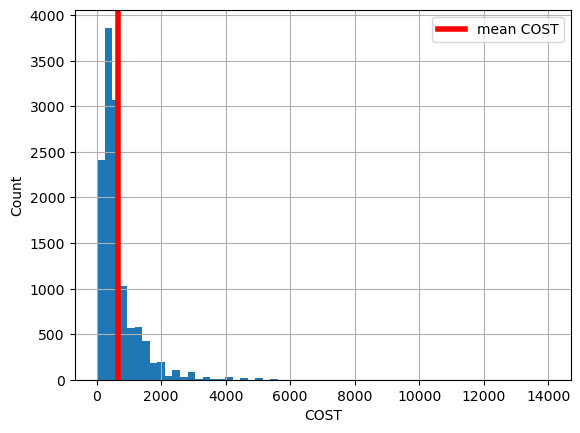

In [39]:
price = Train_data['COST'].hist(bins=60)
mean_val = np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean COST')
plt.xlabel('COST')
plt.ylabel('Count')
plt.legend()
plt.show()

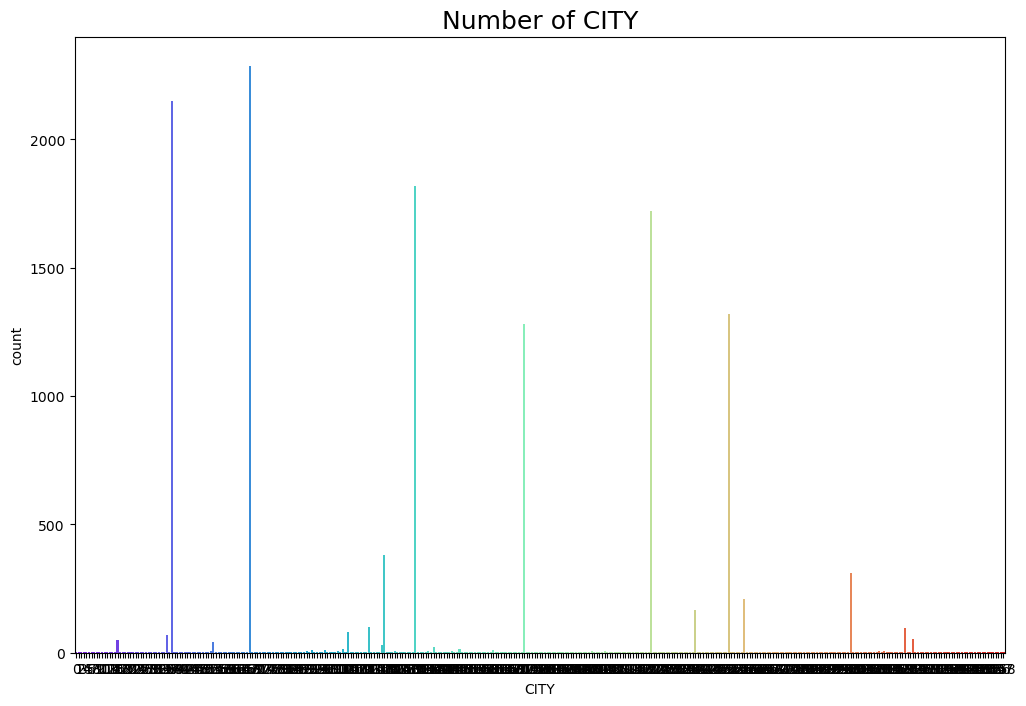

CITY
67     2286
37     2149
131    1819
222    1722
252    1321
       ... 
111       1
62        1
98        1
358       1
212       1
Name: count, Length: 359, dtype: int64


In [40]:
df1=Train_data
plt.subplots(figsize=(12,8))
sns.countplot(x='CITY',data=df1,palette='rainbow')
plt.title('Number of CITY',fontsize=18)
plt.show()

print(df1['CITY'].value_counts())

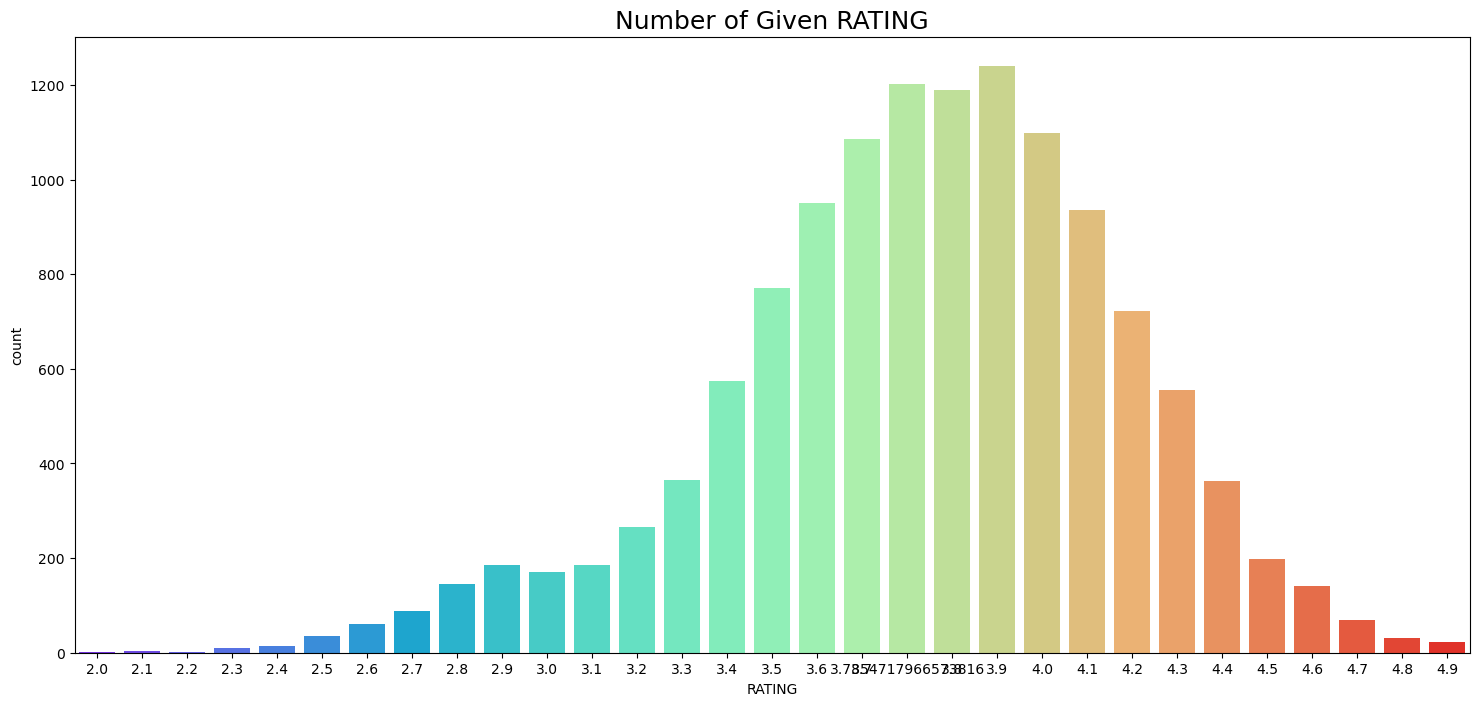

RATING
3.900000    1240
3.785472    1202
3.800000    1190
4.000000    1099
3.700000    1086
3.600000     951
4.100000     936
3.500000     771
4.200000     723
3.400000     575
4.300000     556
3.300000     365
4.400000     362
3.200000     266
4.500000     199
3.100000     186
2.900000     186
3.000000     170
2.800000     146
4.600000     141
2.700000      89
4.700000      69
2.600000      61
2.500000      35
4.800000      32
4.900000      22
2.400000      15
2.300000      10
2.100000       3
2.000000       2
2.200000       2
Name: count, dtype: int64


In [41]:
plt.subplots(figsize=(18,8))
sns.countplot(x='RATING',data=df1,palette='rainbow')
plt.title('Number of Given RATING',fontsize=18)
plt.show()

print(df1['RATING'].value_counts())

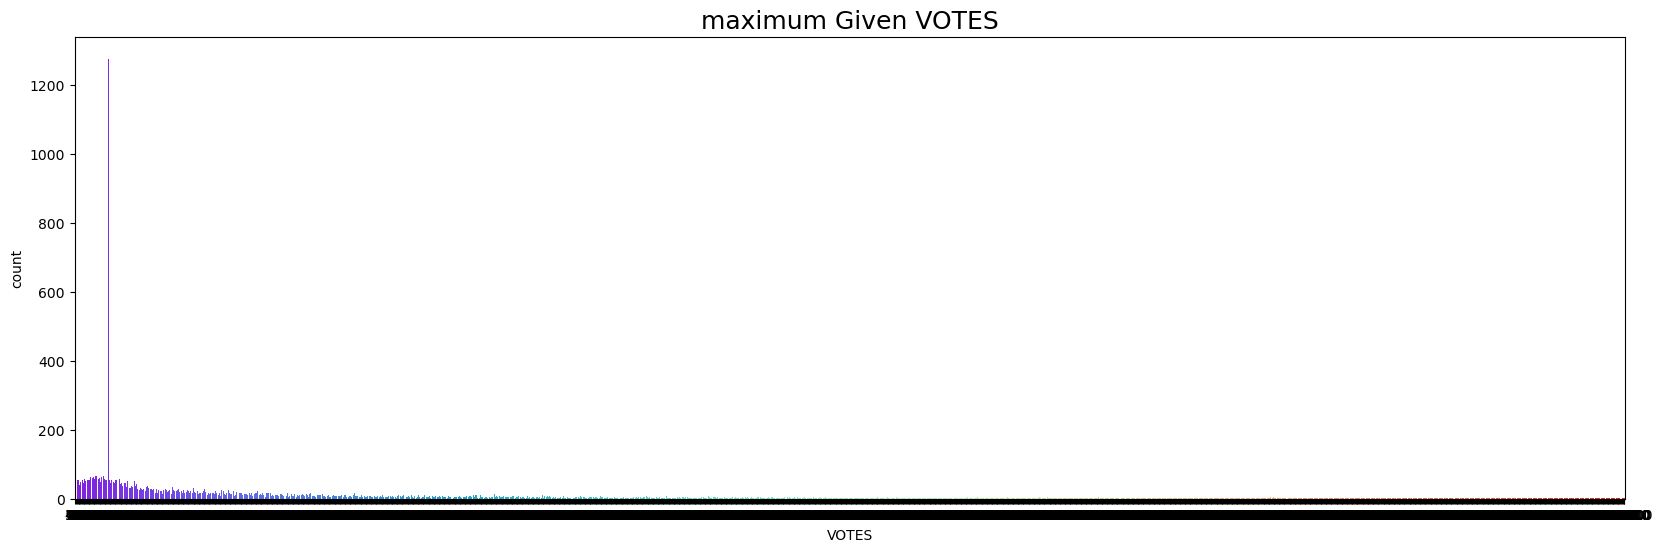

VOTES
44.0      1275
28.0        66
29.0        66
38.0        65
35.0        64
          ... 
1020.0       1
4634.0       1
2297.0       1
1475.0       1
1214.0       1
Name: count, Length: 1847, dtype: int64


In [42]:
plt.subplots(figsize=(20,6))
sns.countplot(x='VOTES',data=df1,palette='rainbow')
plt.title('maximum Given VOTES',fontsize=18)
plt.show()

print(df1['VOTES'].value_counts())

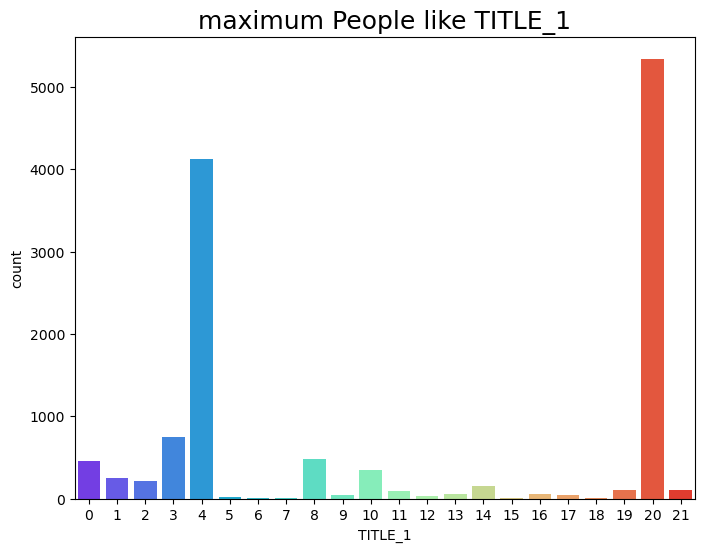

TITLE_1
20    5340
4     4122
3      749
8      478
0      463
10     350
1      254
2      215
14     154
19     103
21     102
11      93
13      56
16      53
9       45
17      44
12      30
5       23
6        6
18       4
15       3
7        3
Name: count, dtype: int64


In [43]:
plt.subplots(figsize=(8,6))
sns.countplot(x='TITLE_1',data=df1,palette='rainbow')
plt.title('maximum People like TITLE_1',fontsize=18)
plt.show()

print(df1['TITLE_1'].value_counts())

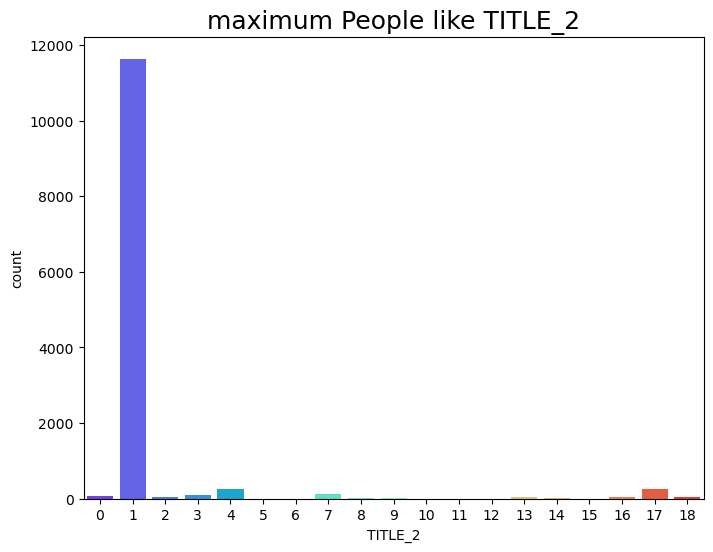

TITLE_2
1     11636
17      261
4       257
7       138
3        94
0        69
18       53
13       47
16       35
2        34
14       27
9        15
8         8
5         5
12        4
11        3
6         2
10        1
15        1
Name: count, dtype: int64


In [44]:
plt.subplots(figsize=(8,6))
sns.countplot(x='TITLE_2',data=df1,palette='rainbow')
plt.title('maximum People like TITLE_2',fontsize=18)
plt.show()

print(df1['TITLE_2'].value_counts())

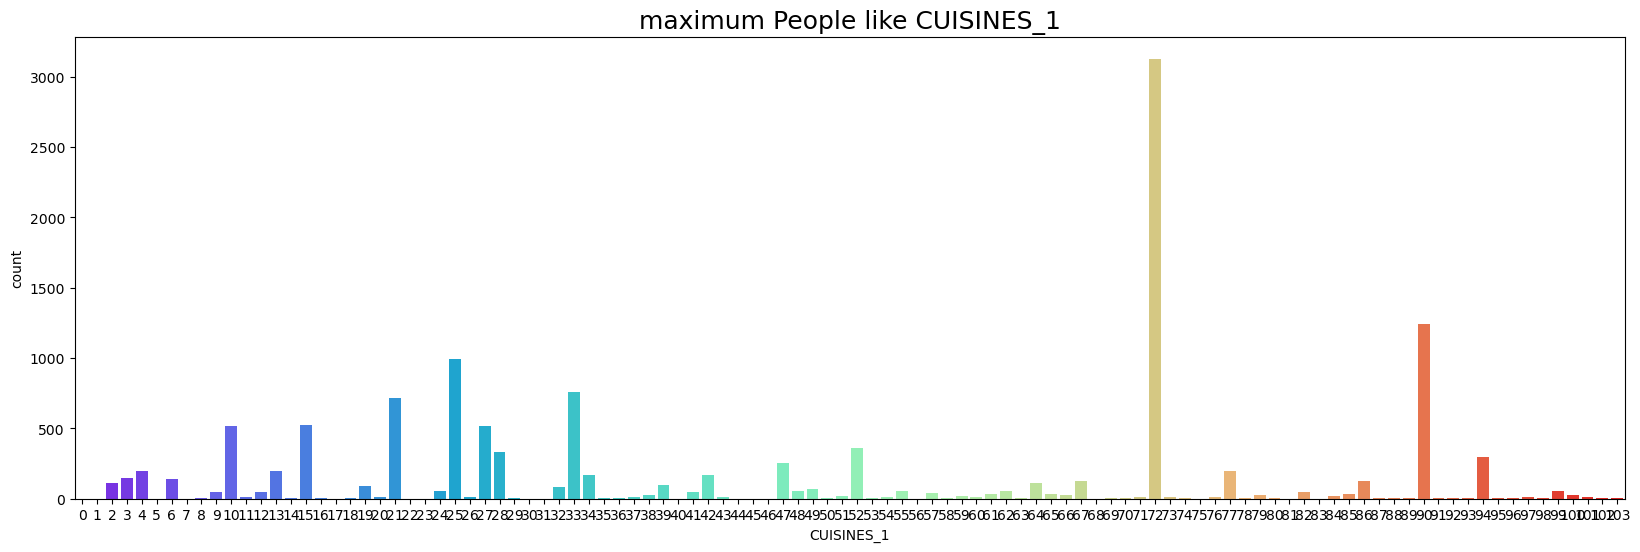

CUISINES_1
72    3129
90    1241
25     996
33     762
21     713
      ... 
22       1
40       1
0        1
7        1
30       1
Name: count, Length: 104, dtype: int64


In [45]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES_1',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES_1',fontsize=18)
plt.show()

print(df1['CUISINES_1'].value_counts())

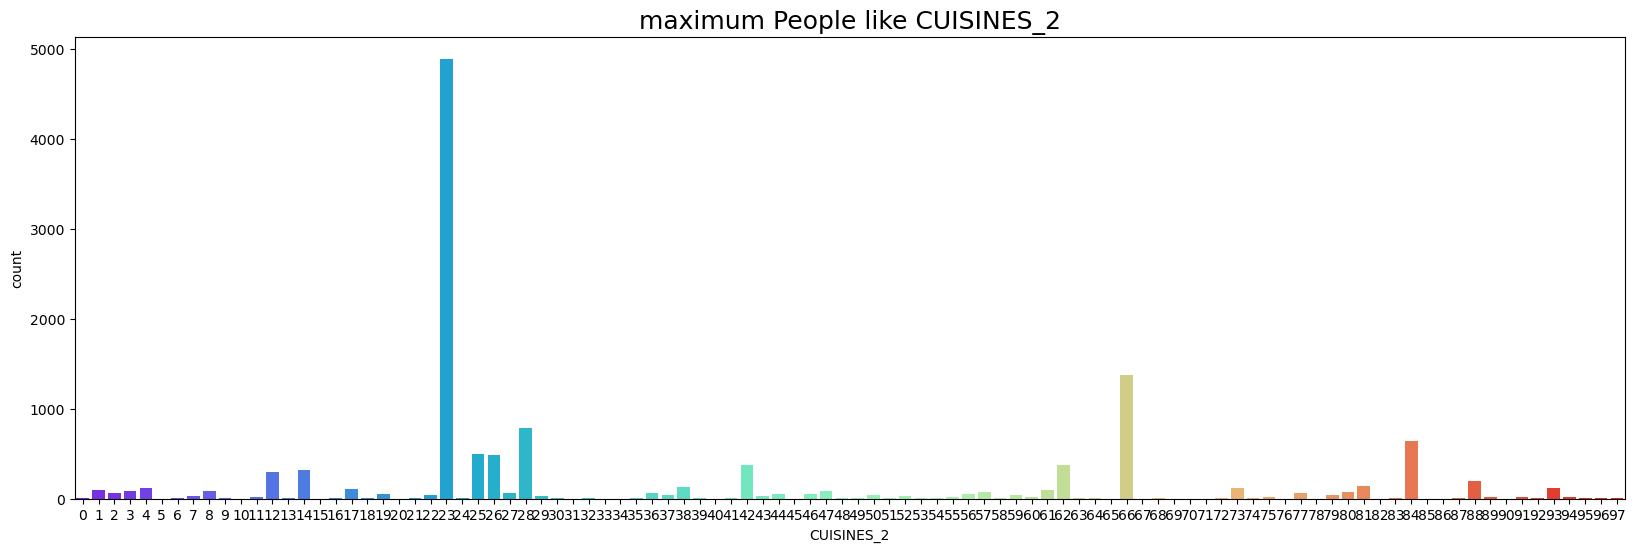

CUISINES_2
23    4892
66    1373
28     782
84     638
25     497
      ... 
82       1
10       1
90       1
31       1
86       1
Name: count, Length: 98, dtype: int64


In [46]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES_2',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES_2',fontsize=18)
plt.show()

print(df1['CUISINES_2'].value_counts())

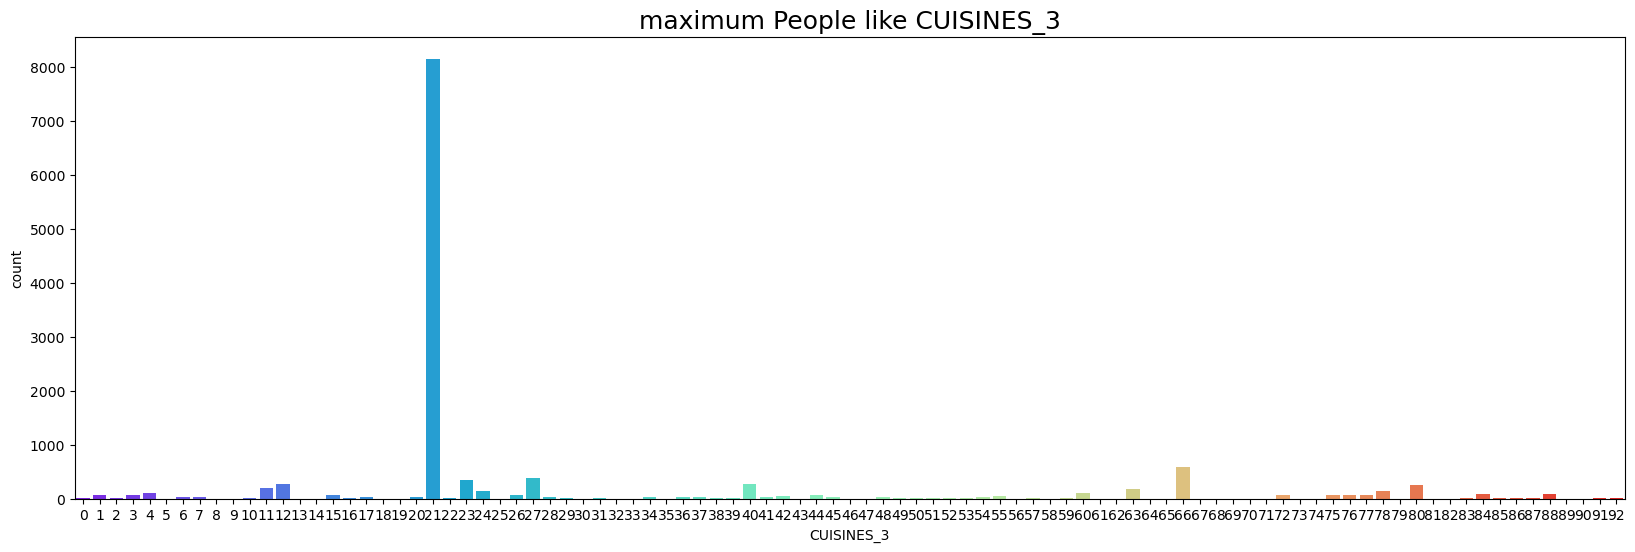

CUISINES_3
21    8145
66     593
27     387
23     345
40     276
      ... 
68       1
35       1
43       1
69       1
14       1
Name: count, Length: 93, dtype: int64


In [47]:
plt.subplots(figsize=(20,6))
sns.countplot(x='CUISINES_3',data=df1,palette='rainbow')
plt.title('maximum People like CUISINES_3',fontsize=18)
plt.show()

print(df1['CUISINES_3'].value_counts())

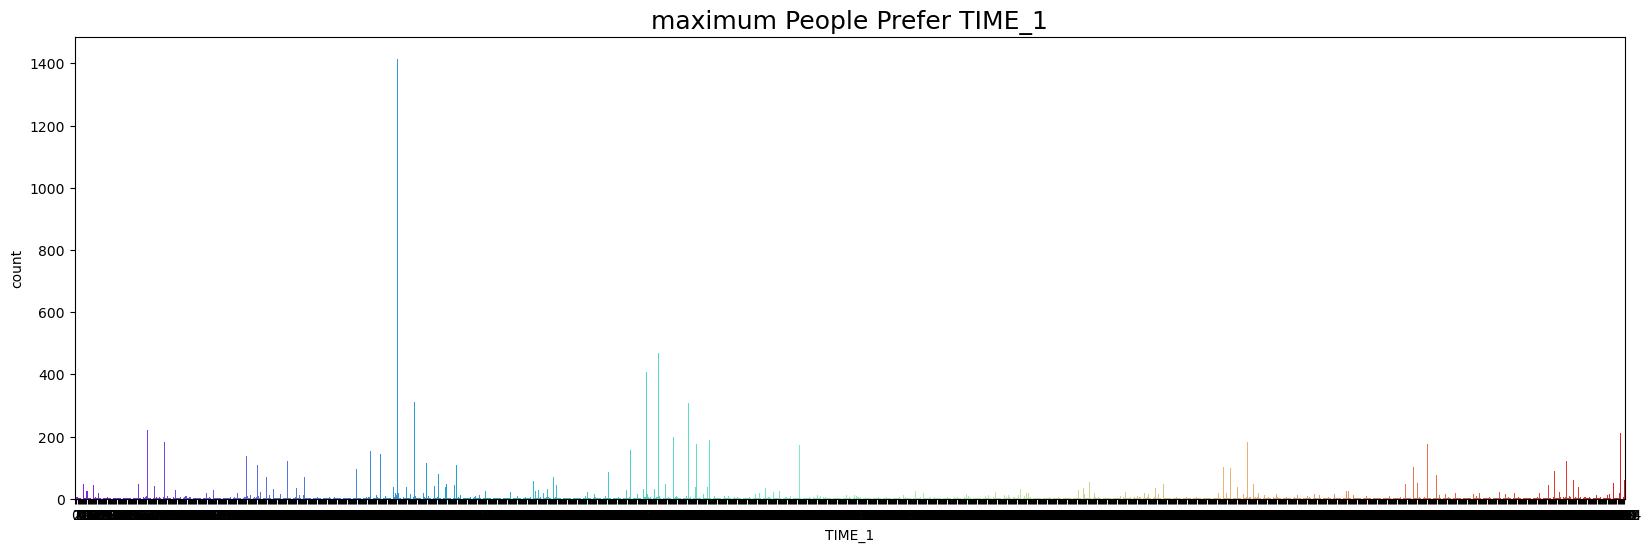

TIME_1
290     1415
525      469
514      407
305      310
552      308
        ... 
1084       1
1349       1
576        1
967        1
444        1
Name: count, Length: 1395, dtype: int64


In [48]:
plt.subplots(figsize=(20,6))
sns.countplot(x='TIME_1',data=df1,palette='rainbow')
plt.title('maximum People Prefer TIME_1',fontsize=18)
plt.show()

print(df1['TIME_1'].value_counts())

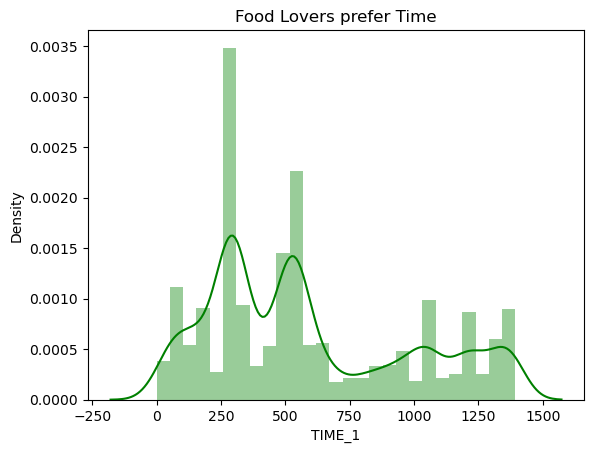

In [49]:
sns.distplot(df1['TIME_1'], color='g')
plt.title("Food Lovers prefer Time")
plt.show()

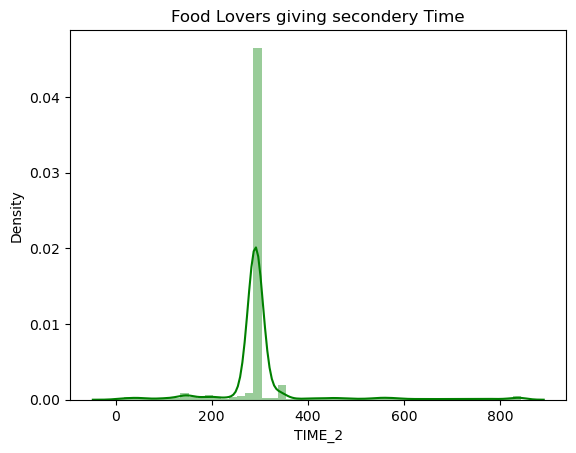

In [50]:
sns.distplot(df1['TIME_2'], color='g')
plt.title("Food Lovers giving secondery Time")
plt.show()

In [51]:
df1.columns

Index(['RESTAURANT_ID', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST',
       'TITLE_1', 'TITLE_2', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3',
       'CUISINES_4', 'TIME_1', 'TIME_2'],
      dtype='object')

<Axes: xlabel='CITY', ylabel='COST'>

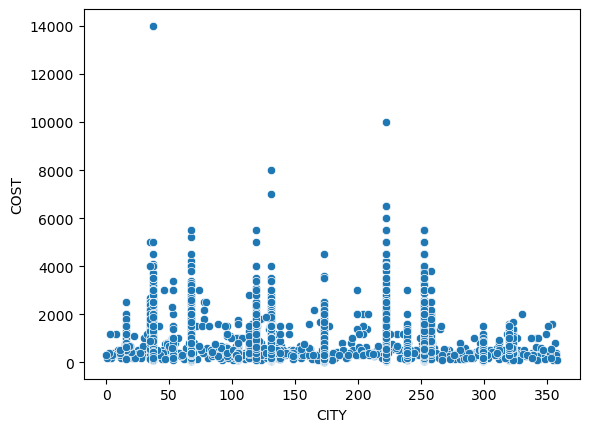

In [52]:
sns.scatterplot(x="CITY" ,y="COST",data=df1)

<Axes: xlabel='LOCALITY', ylabel='COST'>

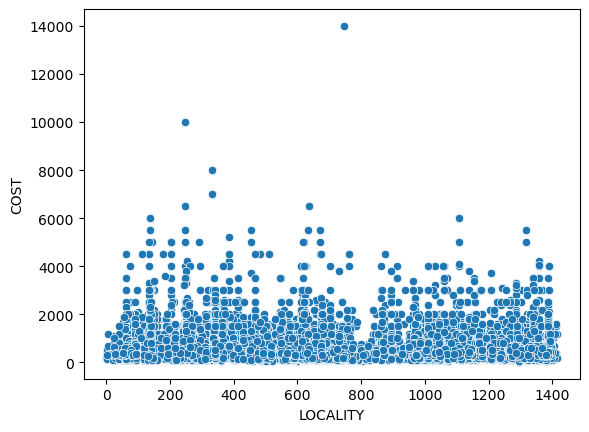

In [53]:
sns.scatterplot(x="LOCALITY" ,y="COST",data=df1)

<Axes: xlabel='RATING', ylabel='COST'>

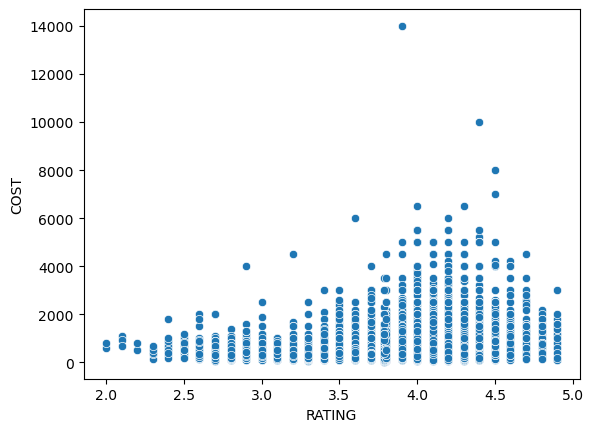

In [54]:
sns.scatterplot(x="RATING" ,y="COST",data=df1)

<Axes: xlabel='VOTES', ylabel='COST'>

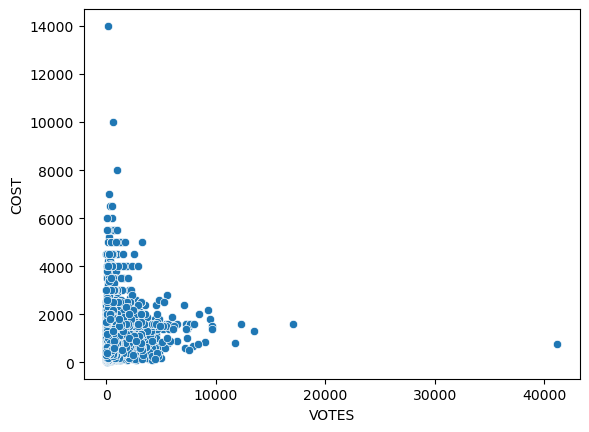

In [55]:
sns.scatterplot(x="VOTES" ,y="COST",data=df1)

<Axes: xlabel='TITLE_1', ylabel='COST'>

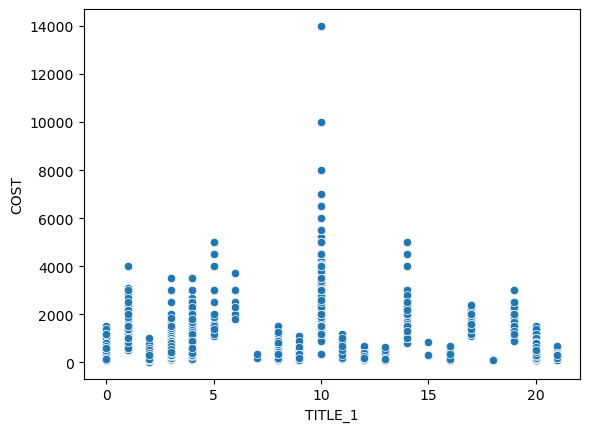

In [56]:
sns.scatterplot(x="TITLE_1" ,y="COST",data=df1)

<Axes: xlabel='TITLE_2', ylabel='COST'>

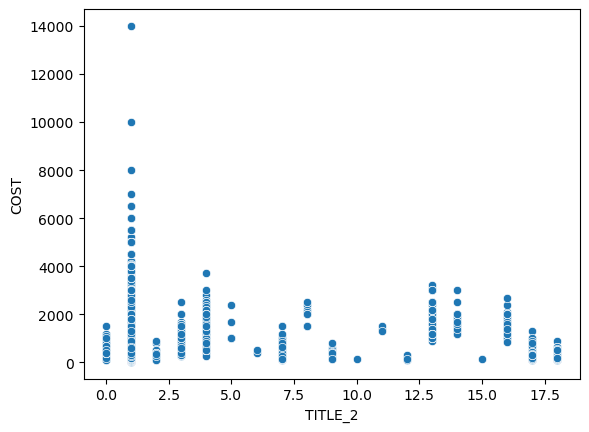

In [57]:
sns.scatterplot(x="TITLE_2" ,y="COST",data=df1)

<Axes: xlabel='CUISINES_1', ylabel='COST'>

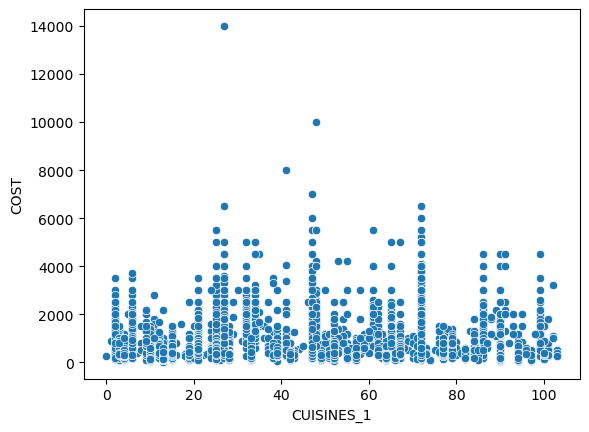

In [58]:
sns.scatterplot(x="CUISINES_1" ,y="COST",data=df1)

<Axes: xlabel='CUISINES_2', ylabel='COST'>

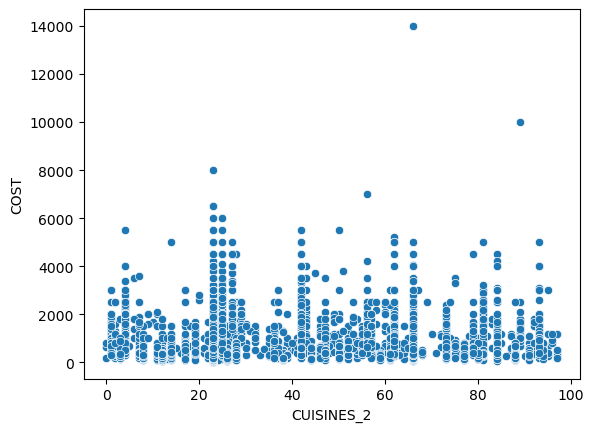

In [59]:
sns.scatterplot(x="CUISINES_2" ,y="COST",data=df1)

<Axes: xlabel='CUISINES_3', ylabel='COST'>

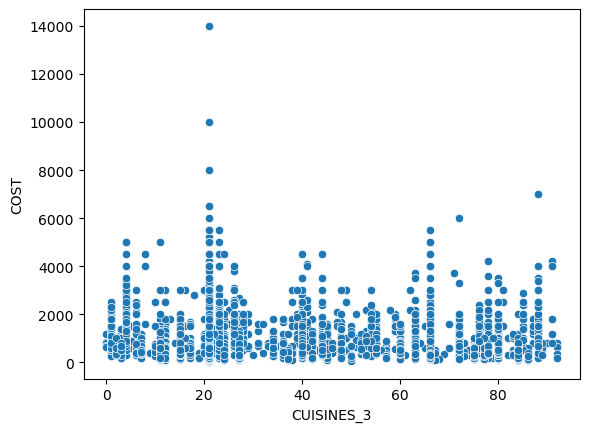

In [60]:
sns.scatterplot(x="CUISINES_3" ,y="COST",data=df1)

<Axes: xlabel='TIME_1', ylabel='COST'>

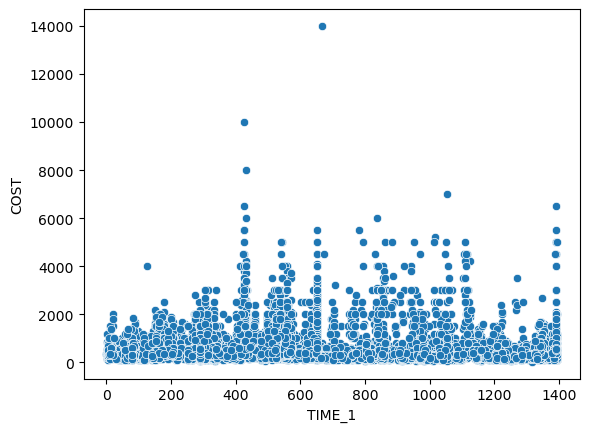

In [61]:
sns.scatterplot(x="TIME_1" ,y="COST",data=df1)

<Axes: xlabel='TIME_2', ylabel='COST'>

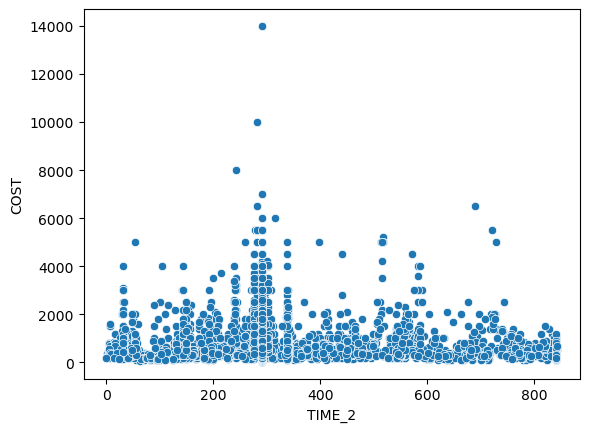

In [62]:
sns.scatterplot(x="TIME_2" ,y="COST",data=df1)

In [63]:
Train_data=df1
train=Train_data

In [64]:
Train_cor=Train_data.corr()
Train_cor

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
RESTAURANT_ID,1.000000,0.005112,-0.004242,0.031232,0.000403,0.040710,-0.000311,-0.015064,0.047963,0.027091,-0.010068,0.032396,0.005949,0.006779
CITY,0.005112,1.000000,0.043072,0.053272,0.043373,0.044555,-0.015925,0.000692,0.013487,0.019128,0.026046,0.022865,-0.011639,-0.021268
LOCALITY,-0.004242,0.043072,1.000000,-0.027983,-0.028965,-0.015050,0.028005,0.003047,0.019262,0.007060,-0.004419,-0.019878,-0.008307,-0.005642
RATING,0.031232,0.053272,-0.027983,1.000000,0.344759,0.320033,-0.157441,0.029417,-0.078193,0.008917,0.069002,0.089921,0.034239,0.076953
VOTES,0.000403,0.043373,-0.028965,0.344759,1.000000,0.255723,-0.144066,0.049878,-0.040369,0.039546,0.084202,0.121397,-0.027787,0.014767
COST,0.040710,0.044555,-0.015050,0.320033,0.255723,1.000000,-0.296176,0.018361,-0.038959,0.057167,0.110186,0.136278,-0.012331,-0.009951
TITLE_1,-0.000311,-0.015925,0.028005,-0.157441,-0.144066,-0.296176,1.000000,-0.108629,0.208093,-0.003936,-0.081686,-0.100541,0.056445,0.006111
TITLE_2,-0.015064,0.000692,0.003047,0.029417,0.049878,0.018361,-0.108629,1.000000,-0.105395,0.020972,0.027035,0.025001,0.035569,0.038771
CUISINES_1,0.047963,0.013487,0.019262,-0.078193,-0.040369,-0.038959,0.208093,-0.105395,1.000000,-0.019474,-0.070932,-0.042743,0.098981,-0.044552
CUISINES_2,0.027091,0.019128,0.007060,0.008917,0.039546,0.057167,-0.003936,0.020972,-0.019474,1.000000,0.048747,0.034233,0.044170,-0.022248


<Axes: >

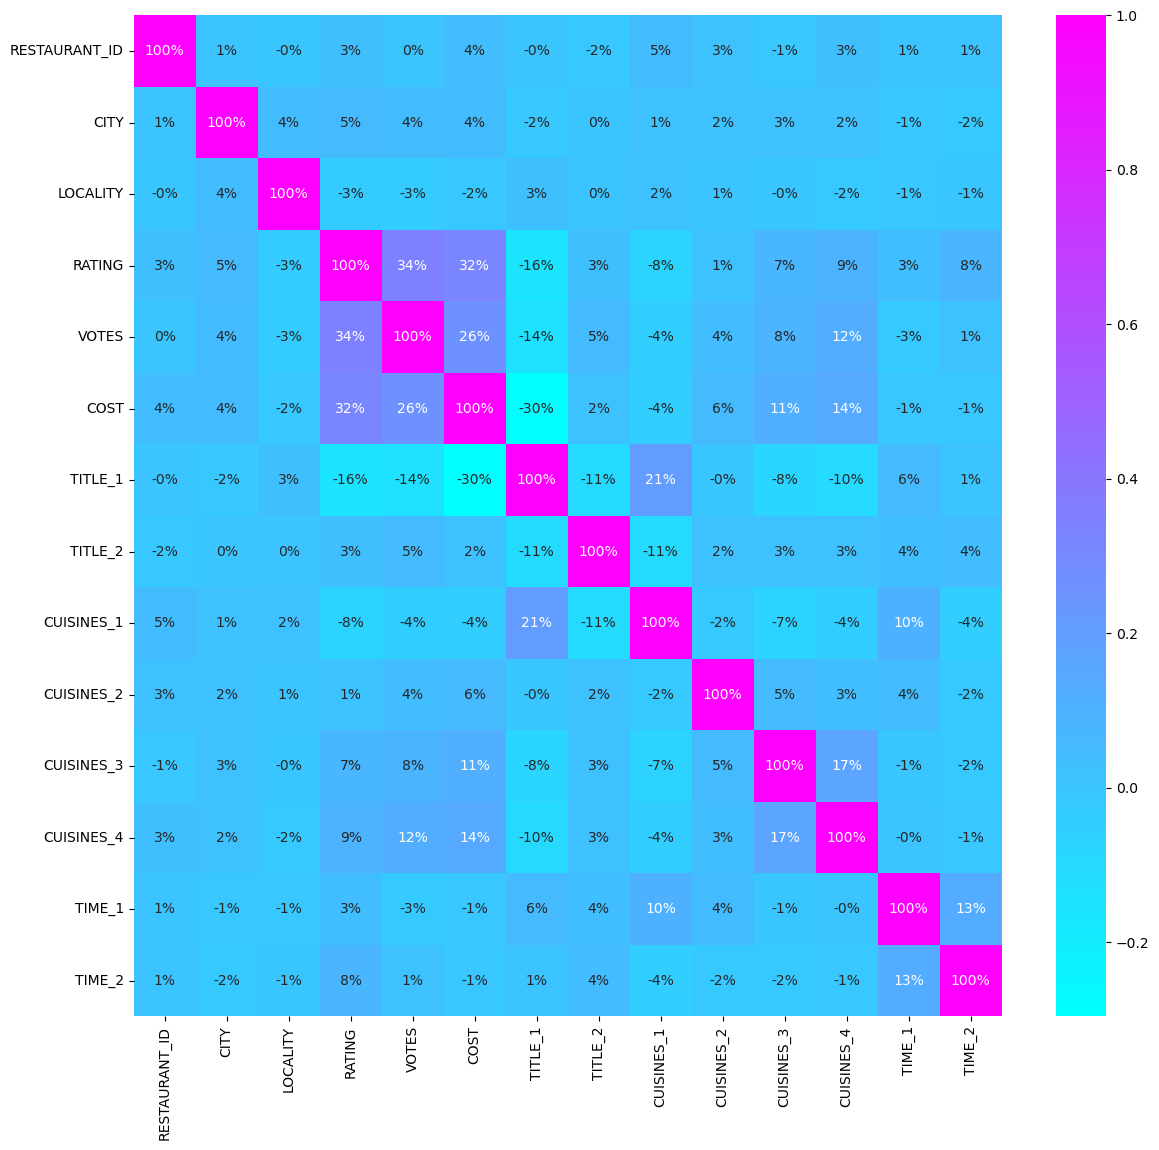

In [65]:
plt.figure(figsize=(14,13))
sns.heatmap(Train_cor,annot=True,fmt='.0%',cmap='cool')

Text(0.5, 1.0, 'correlation with target variable')

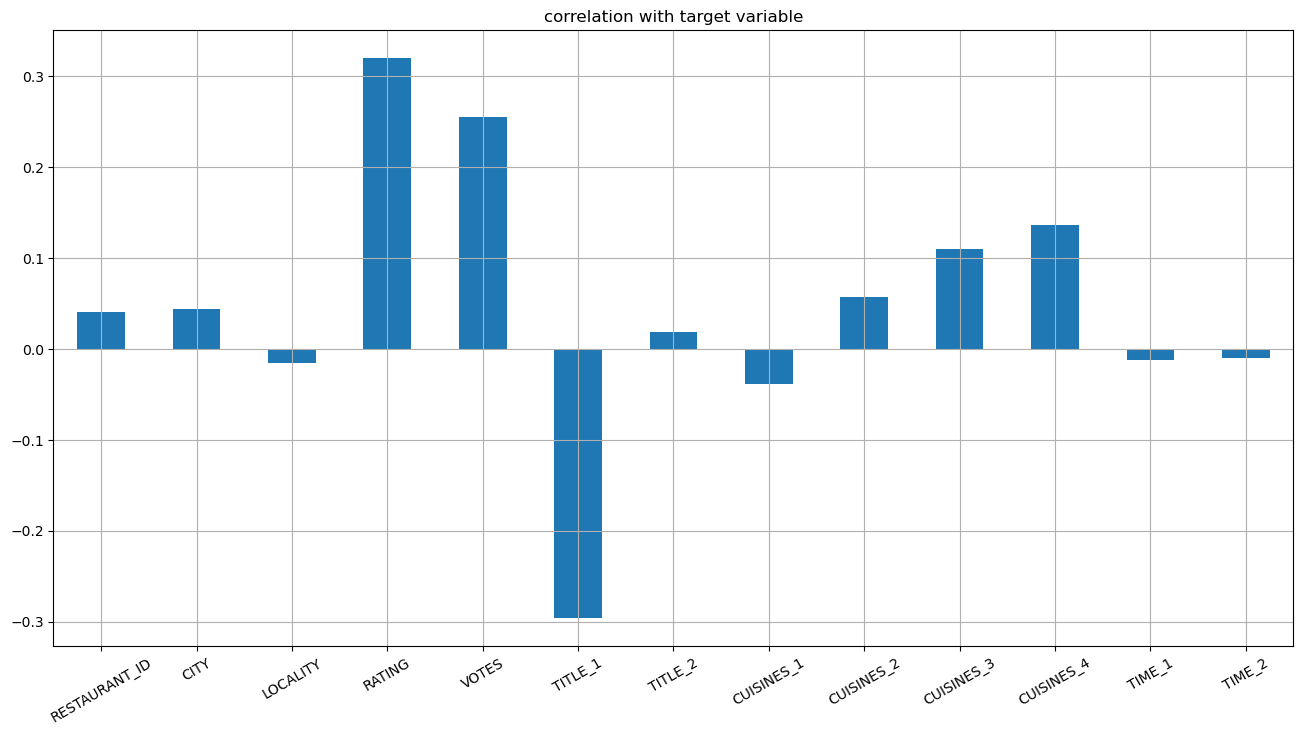

In [66]:
plt.figure(figsize=(16,8))
Train_data.drop('COST',axis=1,).corrwith(Train_data['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title("correlation with target variable")

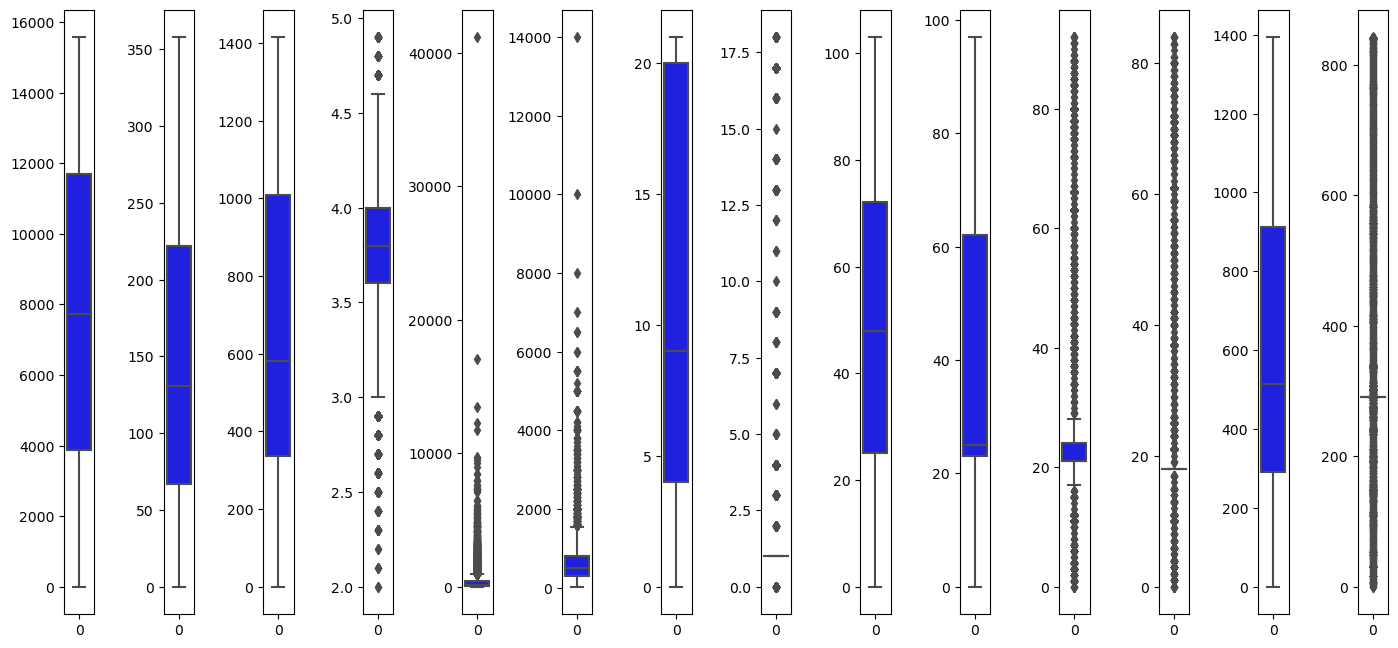

In [67]:
collist=train.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

In [68]:
train.skew()

RESTAURANT_ID     0.006947
CITY              0.266332
LOCALITY          0.352317
RATING           -0.537487
VOTES            14.609221
COST              3.978801
TITLE_1           0.053780
TITLE_2           4.677935
CUISINES_1        0.026008
CUISINES_2        0.866722
CUISINES_3        1.710974
CUISINES_4        2.771886
TIME_1            0.635672
TIME_2            2.669040
dtype: float64

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(train))
threshold=3
print(np.where(z>3))
z

(array([   15,    19,    19, ..., 12671, 12683, 12688], dtype=int64), array([ 7,  7, 13, ...,  7,  7, 11], dtype=int64))


,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,0.372692,2.117762,0.920549,0.461888,0.409609,0.868846,0.923303,0.233885,0.341539,0.240214,1.918746,0.311869,0.623842,0.627708
1,1.207377,0.897082,0.986239,1.032315,0.433092,1.347331,0.923303,0.233885,1.519342,0.946246,0.613819,0.311869,0.903843,0.128641
2,0.700572,0.897082,1.124048,0.036180,0.197021,0.230865,0.923303,0.233885,0.797982,0.621576,0.899895,0.697892,0.664445,0.128641
3,0.313702,0.949957,1.293888,0.783282,0.440508,0.230865,1.083005,0.233885,1.781089,0.621576,0.430122,0.311869,1.042560,0.128641
4,1.693314,0.949957,0.081161,0.036180,0.266236,0.566610,0.421726,0.233885,0.746901,0.621576,0.430122,0.311869,0.692360,0.128641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,1.214036,0.134433,0.777728,0.036180,0.204670,0.247620,1.083005,0.233885,0.797982,0.875817,0.770410,0.311869,0.172135,0.322438
12686,0.427746,0.949957,1.301405,1.281349,1.030301,1.825816,0.923303,0.233885,0.430902,0.536829,0.430122,0.311869,0.134070,1.675678
12687,0.748966,1.152535,1.727906,0.534248,0.281301,1.028341,0.330640,0.233885,0.536235,0.536829,1.317472,0.311869,0.177210,0.128641
12688,0.360764,0.897082,0.053599,0.710921,0.430620,0.407115,0.923303,0.233885,0.797982,1.963211,0.430122,3.871427,0.799798,0.128641


In [70]:
train_new=train[(z<3).all(axis=1)]

In [71]:
print(train.shape,'\t\t',train_new.shape)

(12690, 14) 		 (10862, 14)


In [72]:
train=train_new
train.shape

(10862, 14)

In [73]:
#splitting data into input and output variable
x=train.drop(columns=['COST'],axis=1)                 #separating independent and target variable
x.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,TIME_1,TIME_2
0,9438,320,285,3.6,49.0,4,1,59,32,66,18,343,239
1,13198,67,1046,4.2,30.0,4,1,6,60,41,18,945,291
2,10915,67,1101,3.8,221.0,4,1,72,23,12,32,327,291
3,6346,222,136,4.1,24.0,20,1,100,23,21,18,178,291
4,15387,222,620,3.8,165.0,8,1,28,23,21,18,316,291


In [74]:
y=train["COST"]
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

In [75]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [76]:
train.skew()

RESTAURANT_ID    0.015571
CITY             0.282745
LOCALITY         0.343827
RATING          -0.421987
VOTES            2.681786
COST             1.888589
TITLE_1         -0.020864
TITLE_2          5.791866
CUISINES_1      -0.003152
CUISINES_2       0.903446
CUISINES_3       1.852772
CUISINES_4       3.549151
TIME_1           0.682076
TIME_2           0.324744
dtype: float64

In [77]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [78]:
# Splitting the data into tranning and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [84]:
ls=Lasso()
parameters ={'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(1,10))}
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ls')
print('*************************************')
print('\n')

{'alpha': 1, 'random_state': 1}
ls
*************************************




In [87]:
sv=SVR()
print('sv')
parameters= {'kernel':['linear','poly','rbf','sigmoid']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

sv
{'kernel': 'linear'}
*************************************




In [88]:
sv=SVR()
parameters= {'gamma':['auto','scale']}
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

{'gamma': 'auto'}
*************************************




In [89]:
knn=KNeighborsRegressor()
print('knn')
parameters= {'algorithm':['auto','ball_tree','brute'],'leaf_size':[30],'n_jobs':[1,None],'metric_params':[None]}
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

knn
{'algorithm': 'auto', 'leaf_size': 30, 'metric_params': None, 'n_jobs': 1}
*************************************




In [92]:
dt=DecisionTreeRegressor()
print('dt')
parameters ={'criterion':['mse','friedman_mse','mae'], 'splitter':['best','random']}
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('*************************************')
print('\n')

dt
{'criterion': 'friedman_mse', 'splitter': 'best'}
*************************************




In [98]:
adb=AdaBoostRegressor()
parameters={'base_estimator':[None],'n_estimators':[10,20,30,40,50],'loss':['linear', 'square', 'exponential']}
clf=GridSearchCV(adb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('adb')
print('*************************************')
print('\n')

{'base_estimator': None, 'loss': 'exponential', 'n_estimators': 10}
adb
*************************************




In [99]:
gdb=GradientBoostingRegressor()
parameters = {'loss': ['ls','lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
clf=GridSearchCV(gdb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('gdb')
print('*************************************')
print('\n')

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 200}
gdb
*************************************




In [100]:
from sklearn.tree import ExtraTreeRegressor
ext=ExtraTreeRegressor()
parameters ={'criterion':['friedman_mse','mae','mse'], 'splitter':['random', 'best']}
clf=GridSearchCV(ext,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print('ext')
print('*************************************')
print('\n')

{'criterion': 'friedman_mse', 'splitter': 'best'}
ext
*************************************




In [104]:
ext=ExtraTreeRegressor(criterion= 'friedman_mse', splitter='best')
ext.fit(x_train,y_train)
print('score:',ext.score(x_train,y_train))
predext=ext.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,predext))
print('Mean Squared Error:',mean_squared_error(y_test,predext))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predext)))
print('\n')
print("r2_score",r2_score(y_test,predext))

score: 1.0


Mean absolute Error: 227.61803957662218
Mean Squared Error: 123374.35342843995
Root Mean Squared Error: 351.24685540007323


r2_score 0.37049234087545446


In [105]:
a=np.array(y_test)
a

array([1000,  650,  700, ..., 1300,  450,  800], dtype=int64)

In [106]:
predicted=np.array(ext.predict(x_test))
predicted

array([600., 500., 250., ..., 800., 400., 900.])

In [107]:
train_com=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))

In [108]:
train_com

,original,predicted
0,1000,600.0
1,650,500.0
2,700,250.0
3,300,150.0
4,800,800.0
...,...,...
2168,800,600.0
2169,900,200.0
2170,1300,800.0
2171,450,400.0


In [109]:
#Saving the Model
import pickle
filename= 'Restaurent_FoodCost.pkl'
pickle.dump(ext,open(filename,'wb'))